In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import preprocessing

# kmeans - segmentacja obrazów

  * Segmentacja to podział obrazu na atomowe części. 
  * Przydaj się do wykrywania podstawowych obiektów na obrazach - wykrywamy obiekty a potem klasyfikujemy je np. czy to twarz czy nie. 
    * Ma zastosowanie w głównie w grafice ale nie tylko. 
    * Biometra - identyfikacja osób na podstawie tęczówki. Pierwszym krokiem jest lokalizacja tęczówki a drugiom klasyfikacja.

# Zad. 
Wykonaj klastrowanie k-means na danych uzyskanych z obrazu (segmentacja). 
  * Każdy piksel reprezentuj jako punkt w $R^5$ 
    * gdzie pierwsze 3 współrzędne to odpowiednio kolory RGB 
    * a ostatnie dwie to położenie piksela na obrazku. 

Narysuj obrazek po segmentacji kolorując piksele w grupach jednym kolorem.

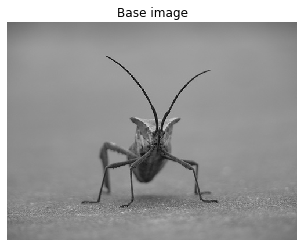

In [47]:
import matplotlib.image as mpimg

img = mpimg.imread("stinkbug.png")
plt.imshow(img, cmap=plt.cm.viridis)
plt.axis('off')
plt.title("Base image")
plt.show()

In [48]:
img.shape

(375, 500, 3)

In [49]:
375*500

187500

In [50]:
# img.reshape(-1,3)

In [51]:
dim_x, dim_y, _ = img.shape
img_2d = np.array([np.append(img[i][j], [i, j]) for i in range(dim_x) for j in range(dim_y)])
img_2d.shape

(187500, 5)

In [52]:
# import seaborn as sns
# df=pd.DataFrame(img_2d[:1000,:])
# sns.pairplot(df)
# plt.show()

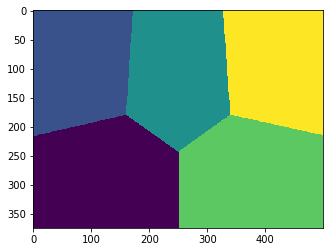

In [15]:
k=5
kmeans = KMeans(n_clusters=k).fit(img_2d)
seg_img = [[kmeans.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img, cmap=plt.cm.viridis)
plt.show()

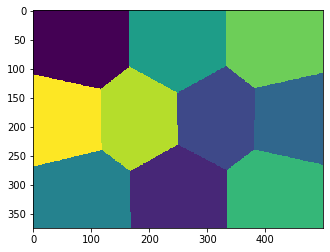

In [16]:
k=10
kmeans = KMeans(n_clusters=k).fit(img_2d)
seg_img = [[kmeans.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img, cmap=plt.cm.viridis)
plt.show()

# Zad. 
Wykonaj klastrowanie k-means na danych uzyskanych z obrazu (segmentacja).
  * **Najpier wykonaj skalowanie każdej współrzędnej**
  * Każdy piksel reprezentuj jako punkt w $R^5$ 
    * gdzie pierwsze 3 współrzędne to odpowiednio kolory RGB 
    * a ostatnie dwie to położenie piksela na obrazku. 

Narysuj obrazek po segmentacji kolorując piksele w grupach jednym kolorem.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(img_2d)
img_2d_standard_scaler = scaler.transform(img_2d)

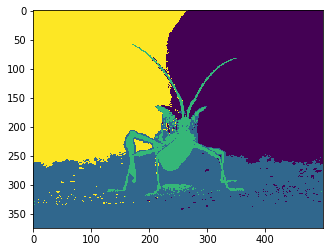

In [18]:
k=4
kmeans_standard_scaler = KMeans(n_clusters=k).fit(img_2d_standard_scaler)
seg_img_standard_scaler = [[kmeans_standard_scaler.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img_standard_scaler, cmap=plt.cm.viridis)
plt.show()

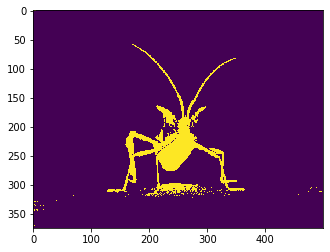

In [54]:
k=2
kmeans_standard_scaler = KMeans(n_clusters=k).fit(img_2d_standard_scaler)
seg_img_standard_scaler = [[kmeans_standard_scaler.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img_standard_scaler, cmap=plt.cm.viridis)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


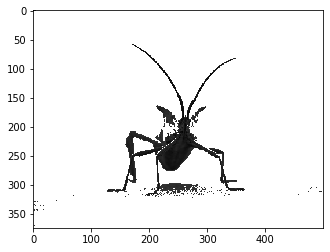

In [89]:
# kmeans_standard_scaler.labels_
img_2d_standard_scaler
n = scaler.inverse_transform(img_2d_standard_scaler)
n[kmeans_standard_scaler.labels_ == 0] = [255, 255, 255, 255, 255]
n

seg_img_standard_scaler = [[n[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]
# seg_img_standard_scaler
plt.imshow(np.array(seg_img_standard_scaler)[:,:,:3], cmap=plt.cm.viridis)
plt.show()

In [86]:
np.array(seg_img_standard_scaler)[:,:,:3].shape

(375, 500, 3)